In [1]:
from google.colab import files
uploaded = files.upload()

Saving Seoul_airpolution_20221109.csv to Seoul_airpolution_20221109 (2).csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Seoul_airpolution_20221109.csv', encoding='cp949')
df.head()

,기준일,시군구코드,시군구명,총생활인구수,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2_5
0,2022-11-09,11000,서울시,1.097881e+07,0.003,0.7,0.019,0.038,71.0,49.0
1,2022-11-09,11110,종로구,3.355340e+05,0.003,0.8,0.019,0.040,72.0,52.0
2,2022-11-09,11140,중구,3.496408e+05,0.003,0.7,0.020,0.041,71.0,55.0
3,2022-11-09,11170,용산구,3.081681e+05,0.003,0.6,0.020,0.035,65.0,45.0
4,2022-11-09,11200,성동구,3.693757e+05,0.003,0.6,0.019,0.042,74.0,46.0


In [4]:
# 기준일을 기준일/계절로 나눠주기

df['기준일'] = pd.to_datetime(df['기준일'])
month = list(df['기준일'].dt.strftime('%m'))
month

['11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',

In [5]:
seasons = []

for i in month:
  if (i == '01' or '02' or '12'):
    season = 'Winter'
    seasons.append(season)
  elif (i == '03' or '04' or '05'):
    season = 'Spring'
    seasons.append(season)
  elif (i == '06' or '07' or '08'):
    season = 'Summer'
    seasons.append(season)
  elif (i == '09' or '10' or '11'):
    season = 'Autumn'
    seasons.append(season)

df['계절'] = seasons

In [6]:
df.head()

,기준일,시군구코드,시군구명,총생활인구수,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2_5,계절
0,2022-11-09,11000,서울시,1.097881e+07,0.003,0.7,0.019,0.038,71.0,49.0,Winter
1,2022-11-09,11110,종로구,3.355340e+05,0.003,0.8,0.019,0.040,72.0,52.0,Winter
2,2022-11-09,11140,중구,3.496408e+05,0.003,0.7,0.020,0.041,71.0,55.0,Winter
3,2022-11-09,11170,용산구,3.081681e+05,0.003,0.6,0.020,0.035,65.0,45.0,Winter
4,2022-11-09,11200,성동구,3.693757e+05,0.003,0.6,0.019,0.042,74.0,46.0,Winter


In [7]:
df.shape

(43342, 11)

In [8]:
# 결측치는 평균으로 대체
df.isnull().sum()

기준일         0
시군구코드       0
시군구명        0
총생활인구수      0
아황산가스     425
일산화탄소     604
오존        346
이산화질소     410
PM10      281
PM2_5     279
계절          0
dtype: int64

In [9]:
df.to_csv('df_1.csv', index = False)

In [10]:
df = pd.read_csv('df_1.csv')

In [11]:
df.shape

(43342, 11)

In [12]:
df = df.fillna(df.mean())

<ipython-input-12-04e87d67d337>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [13]:
# 결측치는 같은날짜의 서울시 데이터로 채우기(총생활인구수는 서울시데이터가 아닌 앞뒤전일 데이터로 채워야 하기때문에 별도 체크)
# for i in df['시군구명']:
#   df.query('시군구명 == "서울시" or 시군구명 == i').bfill().ffill()

In [14]:
df.isnull().sum()

기준일       0
시군구코드     0
시군구명      0
총생활인구수    0
아황산가스     0
일산화탄소     0
오존        0
이산화질소     0
PM10      0
PM2_5     0
계절        0
dtype: int64

In [15]:
df.shape

(43342, 11)

In [16]:
df.head()

,기준일,시군구코드,시군구명,총생활인구수,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2_5,계절
0,2022-11-09,11000,서울시,1.097881e+07,0.003,0.7,0.019,0.038,71.0,49.0,Winter
1,2022-11-09,11110,종로구,3.355340e+05,0.003,0.8,0.019,0.040,72.0,52.0,Winter
2,2022-11-09,11140,중구,3.496408e+05,0.003,0.7,0.020,0.041,71.0,55.0,Winter
3,2022-11-09,11170,용산구,3.081681e+05,0.003,0.6,0.020,0.035,65.0,45.0,Winter
4,2022-11-09,11200,성동구,3.693757e+05,0.003,0.6,0.019,0.042,74.0,46.0,Winter


In [17]:
아황산가스예보 = []

for i in df['아황산가스']:
  if i<=0.020:
    gas = '좋음'
    아황산가스예보.append(gas)
  elif i<=0.050:
    gas = '보통'
    아황산가스예보.append(gas)
  elif i<=0.150:
    gas = '나쁨'
    아황산가스예보.append(gas)
  elif i>=0.151:
    gas = '매우 나쁨'
    아황산가스예보.append(gas)

df['아황산가스예보'] = 아황산가스예보
df['아황산가스예보'].head()

0    좋음
1    좋음
2    좋음
3    좋음
4    좋음
Name: 아황산가스예보, dtype: object

In [18]:
일산화탄소예보 = []

for i in df['일산화탄소']:
  if i<=2:
    gas = '좋음'
    일산화탄소예보.append(gas)
  elif i<=9:
    gas = '보통'
    일산화탄소예보.append(gas)
  elif i<=15:
    gas = '나쁨'
    일산화탄소예보.append(gas)
  elif i>=15.01:
    gas = '매우 나쁨'
    일산화탄소예보.append(gas)

df['일산화탄소예보'] = 일산화탄소예보
df['일산화탄소예보'].head()

0    좋음
1    좋음
2    좋음
3    좋음
4    좋음
Name: 일산화탄소예보, dtype: object

In [19]:
오존예보 = []

for i in df['오존']:
  if i<=0.03:
    gas = '좋음'
    오존예보.append(gas)
  elif i<=0.09:
    gas = '보통'
    오존예보.append(gas)
  elif i<=0.15:
    gas = '나쁨'
    오존예보.append(gas)
  elif i>=0.151:
    gas = '매우 나쁨'
    오존예보.append(gas)

df['오존예보'] = 오존예보
df['오존예보'].head()

0    좋음
1    좋음
2    좋음
3    좋음
4    좋음
Name: 오존예보, dtype: object

In [20]:
이산화질소예보 = []

for i in df['이산화질소']:
  if i<=0.03:
    gas = '좋음'
    이산화질소예보.append(gas)
  elif i<=0.06:
    gas = '보통'
    이산화질소예보.append(gas)
  elif i<=0.20:
    gas = '나쁨'
    이산화질소예보.append(gas)
  elif i>=0.201:
    gas = '매우 나쁨'
    이산화질소예보.append(gas)

df['이산화질소예보'] = 이산화질소예보
df['이산화질소예보'].head()

0    보통
1    보통
2    보통
3    보통
4    보통
Name: 이산화질소예보, dtype: object

In [21]:
# 미세먼지예보는 보통 / 나쁨으로만 구분(ㅠㅠ 아직 이진법 외 모델링은.. 자신이..)

미세먼지예보 = []

for i in df['PM10']:
  if i<=80:
    gas = '보통'
    미세먼지예보.append(gas)
  elif i>80:
    gas = '나쁨'
    미세먼지예보.append(gas)

df['미세먼지예보'] = 미세먼지예보
df['미세먼지예보'].head()

0    보통
1    보통
2    보통
3    보통
4    보통
Name: 미세먼지예보, dtype: object

In [22]:
df.head()

,기준일,시군구코드,시군구명,총생활인구수,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2_5,계절,아황산가스예보,일산화탄소예보,오존예보,이산화질소예보,미세먼지예보
0,2022-11-09,11000,서울시,1.097881e+07,0.003,0.7,0.019,0.038,71.0,49.0,Winter,좋음,좋음,좋음,보통,보통
1,2022-11-09,11110,종로구,3.355340e+05,0.003,0.8,0.019,0.040,72.0,52.0,Winter,좋음,좋음,좋음,보통,보통
2,2022-11-09,11140,중구,3.496408e+05,0.003,0.7,0.020,0.041,71.0,55.0,Winter,좋음,좋음,좋음,보통,보통
3,2022-11-09,11170,용산구,3.081681e+05,0.003,0.6,0.020,0.035,65.0,45.0,Winter,좋음,좋음,좋음,보통,보통
4,2022-11-09,11200,성동구,3.693757e+05,0.003,0.6,0.019,0.042,74.0,46.0,Winter,좋음,좋음,좋음,보통,보통


In [23]:
df_2 = df.drop(columns=['아황산가스','일산화탄소','오존','이산화질소','PM10','PM2_5'])

In [24]:
df_2 = df_2.query("시군구명!='서울시'")
df_2

,기준일,시군구코드,시군구명,총생활인구수,계절,아황산가스예보,일산화탄소예보,오존예보,이산화질소예보,미세먼지예보
1,2022-11-09,11110,종로구,335534.0027,Winter,좋음,좋음,좋음,보통,보통
2,2022-11-09,11140,중구,349640.7957,Winter,좋음,좋음,좋음,보통,보통
3,2022-11-09,11170,용산구,308168.0757,Winter,좋음,좋음,좋음,보통,보통
4,2022-11-09,11200,성동구,369375.7211,Winter,좋음,좋음,좋음,보통,보통
5,2022-11-09,11215,광진구,377715.8203,Winter,좋음,좋음,좋음,보통,보통
...,...,...,...,...,...,...,...,...,...,...
43337,2018-04-05,11620,관악구,527264.1147,Winter,좋음,좋음,좋음,좋음,보통
43338,2018-04-05,11650,서초구,657040.9327,Winter,좋음,좋음,좋음,좋음,보통
43339,2018-04-05,11680,강남구,912863.8679,Winter,좋음,좋음,좋음,보통,보통
43340,2018-04-05,11710,송파구,773375.7311,Winter,좋음,좋음,좋음,좋음,보통


In [25]:
df_2['미세먼지예보'].value_counts()

보통    39875
나쁨     1800
Name: 미세먼지예보, dtype: int64

In [26]:
df_2['미세먼지예보'] = df_2['미세먼지예보'].replace(['보통', '나쁨'],[0,1]).astype(int)

In [27]:
df_2['미세먼지예보'].value_counts()

0    39875
1     1800
Name: 미세먼지예보, dtype: int64

In [28]:
# 2018-04-05 ~ 2022-11-09 자료이고, 예측 테스트는 2022년 가을 기준이기때문에 train은 그 이전지정, val은 train의 8:2, test는 2022년 가을(2022-09 ~ 2022-11)기준으로 나눈다.
target = '미세먼지예보'
feature = df_2.drop(columns=target).columns

train = df_2.query('기준일 >= "2018-01-01" and 기준일 <= "2022-08-31"')
train, val = train_test_split(train, test_size=0.2, random_state=42)
test = df_2.query('기준일 >= "2022-09-01" and 기준일 <= "2022-12-31"')

train.shape, val.shape, test.shape

((31940, 10), (7985, 10), (1750, 10))

In [29]:
!pip3 install imbalanced-learn
!pip install category_encoders
!pip3 install xgboost==1.7.2
!pip install scikit-learn==1.0 -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# 타겟의 최빈값으로 예측하는 baseline 모델의 성능을 확인

baseline_score = df_2[target].value_counts(normalize=True).max()
print("baseline score:", baseline_score)

baseline score: 0.9568086382723455


In [31]:
# target 불균형이 심하기때문에 Oversampling + Undersampling 진행

X_train, y_train = train.drop(columns=[target]), train[target]
X_val, y_val = val.drop(columns=[target]), val[target]
X_test, y_test = test.drop(columns=[target]), test[target]

from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

from imblearn.combine import SMOTEENN

X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(X_train_encoded, y_train)

from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_train_sampled == 0).sum() / (y_train_sampled == 1).sum())

watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50)  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.


[0]	validation_0-auc:0.76635	validation_1-auc:0.66432
[1]	validation_0-auc:0.77914	validation_1-auc:0.66889


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.78318	validation_1-auc:0.66820
[3]	validation_0-auc:0.78762	validation_1-auc:0.67049
[4]	validation_0-auc:0.79112	validation_1-auc:0.65982
[5]	validation_0-auc:0.79114	validation_1-auc:0.66569
[6]	validation_0-auc:0.79951	validation_1-auc:0.66245
[7]	validation_0-auc:0.80148	validation_1-auc:0.67094
[8]	validation_0-auc:0.80358	validation_1-auc:0.67655
[9]	validation_0-auc:0.80564	validation_1-auc:0.67257
[10]	validation_0-auc:0.80622	validation_1-auc:0.67627
[11]	validation_0-auc:0.80802	validation_1-auc:0.67891
[12]	validation_0-auc:0.81127	validation_1-auc:0.68401
[13]	validation_0-auc:0.82266	validation_1-auc:0.68267
[14]	validation_0-auc:0.82308	validation_1-auc:0.68908
[15]	validation_0-auc:0.82867	validation_1-auc:0.69063
[16]	validation_0-auc:0.83214	validation_1-auc:0.68984
[17]	validation_0-auc:0.83608	validation_1-auc:0.69398
[18]	validation_0-auc:0.83743	validation_1-auc:0.69310
[19]	validation_0-auc:0.83914	validation_1-auc:0.69225
[20]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=987654321, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

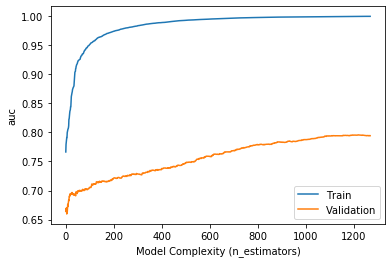

검증 정확도 0.8644959298685034
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7630
           1       0.15      0.45      0.23       355

    accuracy                           0.86      7985
   macro avg       0.56      0.66      0.58      7985
weighted avg       0.94      0.86      0.89      7985

ROC-AUC: 0.7955824857401289


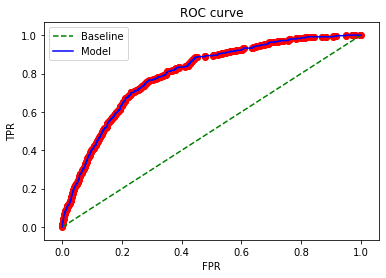

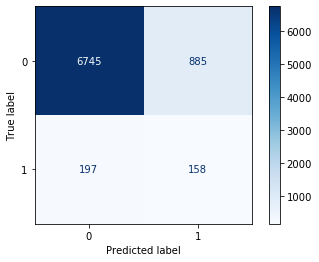

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded, iteration_range=(0, model.best_iteration)
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
 
def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()

def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_val_encoded, y_val))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_val_encoded, y_val,cmap='Blues')
    plt.show()

summarize_results(model, X_val_encoded, y_val)

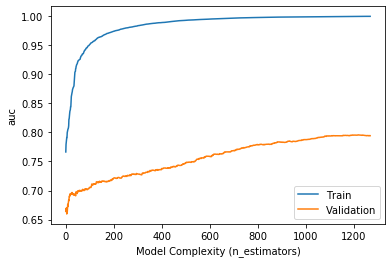

검증 정확도 0.9965714285714286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1750
   macro avg       0.50      0.50      0.50      1750
weighted avg       1.00      1.00      1.00      1750

ROC-AUC: 0.886090440755581


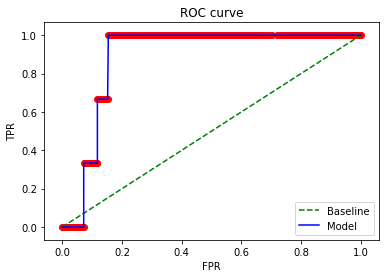

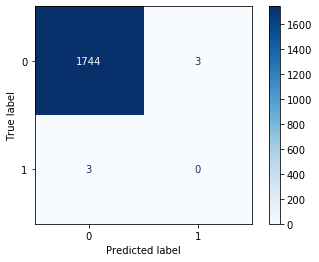

In [33]:
# 최종 test 검정

summarize_results(model, X_test_encoded, y_test)

In [34]:
# test data set 양이 적고 불균형 했기 떄문에 해당 결과 발생. 불균형을 맞추고 test 데이터를 쪼개거나 원인 찾기

In [35]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
gu_pop = df['PM10'].groupby([df['시군구명'],df['총생활인구수']])
gu_pop = pd.DataFrame(gu_pop.sum()).reset_index()
gu_pop.head()

,시군구명,총생활인구수,PM10
0,강남구,520214.8117,72.0
1,강남구,523081.5190,10.0
2,강남구,535565.7819,14.0
3,강남구,537910.8285,44.0
4,강남구,550896.0107,44.0


In [37]:
gu_강남구= gu_pop[gu_pop['시군구명']=='강남구']
gu_강남구

,시군구명,총생활인구수,PM10
0,강남구,520214.8117,72.0
1,강남구,523081.5190,10.0
2,강남구,535565.7819,14.0
3,강남구,537910.8285,44.0
4,강남구,550896.0107,44.0
...,...,...,...
1662,강남구,956814.1690,57.0
1663,강남구,957507.0301,40.0
1664,강남구,958954.0774,25.0
1665,강남구,963043.3778,41.0


In [38]:
a = pd.DataFrame(df.시군구명.unique())
a = a.drop(index = 0).reset_index(drop = True)
a

,0
0,종로구
1,중구
2,용산구
3,성동구
4,광진구
5,동대문구
6,중랑구
7,성북구
8,강북구
9,도봉구


In [39]:
gu_종로구= gu_pop[gu_pop['시군구명']=='종로구']
gu_종로구_mean = pd.DataFrame(gu_종로구.mean()).T
gu_중구= gu_pop[gu_pop['시군구명']=='중구']
gu_중구_mean = pd.DataFrame(gu_중구.mean()).T
gu_용산구= gu_pop[gu_pop['시군구명']=='용산구']
gu_용산구_mean = pd.DataFrame(gu_용산구.mean()).T
gu_성동구= gu_pop[gu_pop['시군구명']=='성동구']
gu_성동구_mean = pd.DataFrame(gu_성동구.mean()).T
gu_광진구= gu_pop[gu_pop['시군구명']=='광진구']
gu_광진구_mean = pd.DataFrame(gu_광진구.mean()).T
gu_동대문구= gu_pop[gu_pop['시군구명']=='동대문구']
gu_동대문구_mean = pd.DataFrame(gu_동대문구.mean()).T
gu_중랑구= gu_pop[gu_pop['시군구명']=='중랑구']
gu_중랑구_mean = pd.DataFrame(gu_중랑구.mean()).T
gu_성북구= gu_pop[gu_pop['시군구명']=='성북구']
gu_성북구_mean = pd.DataFrame(gu_성북구.mean()).T
gu_강북구= gu_pop[gu_pop['시군구명']=='강북구']
gu_강북구_mean = pd.DataFrame(gu_강북구.mean()).T
gu_도봉구= gu_pop[gu_pop['시군구명']=='도봉구']
gu_도봉구_mean = pd.DataFrame(gu_도봉구.mean()).T
gu_노원구= gu_pop[gu_pop['시군구명']=='노원구']
gu_노원구_mean = pd.DataFrame(gu_노원구.mean()).T
gu_은평구= gu_pop[gu_pop['시군구명']=='은평구']
gu_은평구_mean = pd.DataFrame(gu_은평구.mean()).T
gu_서대문구= gu_pop[gu_pop['시군구명']=='서대문구']
gu_서대문구_mean = pd.DataFrame(gu_서대문구.mean()).T
gu_마포구= gu_pop[gu_pop['시군구명']=='마포구']
gu_마포구_mean = pd.DataFrame(gu_마포구.mean()).T
gu_양천구= gu_pop[gu_pop['시군구명']=='양천구']
gu_양천구_mean = pd.DataFrame(gu_양천구.mean()).T
gu_강서구= gu_pop[gu_pop['시군구명']=='강서구']
gu_강서구_mean = pd.DataFrame(gu_강서구.mean()).T
gu_구로구= gu_pop[gu_pop['시군구명']=='구로구']
gu_구로구_mean = pd.DataFrame(gu_구로구.mean()).T
gu_금천구= gu_pop[gu_pop['시군구명']=='금천구']
gu_금천구_mean = pd.DataFrame(gu_금천구.mean()).T
gu_영등포구= gu_pop[gu_pop['시군구명']=='영등포구']
gu_영등포구_mean = pd.DataFrame(gu_영등포구.mean()).T
gu_동작구= gu_pop[gu_pop['시군구명']=='동작구']
gu_동작구_mean = pd.DataFrame(gu_동작구.mean()).T
gu_관악구= gu_pop[gu_pop['시군구명']=='관악구']
gu_관악구_mean = pd.DataFrame(gu_관악구.mean()).T
gu_서초구= gu_pop[gu_pop['시군구명']=='서초구']
gu_서초구_mean = pd.DataFrame(gu_서초구.mean()).T
gu_강남구= gu_pop[gu_pop['시군구명']=='강남구']
gu_강남구_mean = pd.DataFrame(gu_강남구.mean()).T
gu_송파구= gu_pop[gu_pop['시군구명']=='송파구']
gu_송파구_mean = pd.DataFrame(gu_송파구.mean()).T
gu_강동구= gu_pop[gu_pop['시군구명']=='강동구']
gu_강동구_mean = pd.DataFrame(gu_강동구.mean()).T

<ipython-input-39-8edb7a9ba6e6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gu_종로구_mean = pd.DataFrame(gu_종로구.mean()).T
<ipython-input-39-8edb7a9ba6e6>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gu_중구_mean = pd.DataFrame(gu_중구.mean()).T
<ipython-input-39-8edb7a9ba6e6>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gu_용산구_mean = pd.DataFrame(gu_용산구.mean()).T
<ipython-input-39-8edb7a9ba6e6>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric

In [40]:
pop_list = [gu_종로구_mean, gu_중구_mean, gu_용산구_mean, gu_성동구_mean, gu_광진구_mean, gu_동대문구_mean,gu_중랑구_mean, gu_성북구_mean, gu_강북구_mean, gu_도봉구_mean, gu_노원구_mean, gu_은평구_mean, gu_서대문구_mean, gu_마포구_mean, gu_양천구_mean, gu_강서구_mean, gu_구로구_mean, gu_금천구_mean, gu_영등포구_mean, gu_동작구_mean, gu_관악구_mean, gu_서초구_mean, gu_강남구_mean, gu_송파구_mean, gu_강동구_mean]
gu_mean = pd.concat(pop_list)
gu_mean = gu_mean.reset_index(drop = True)
gu_mean

,총생활인구수,PM10
0,313545.892353,35.364555
1,315164.297204,35.719085
2,313230.471679,34.210211
3,361669.787035,37.501756
4,393909.212051,36.107720
5,383912.331186,34.961939
6,362349.156457,34.755926
7,443180.525351,37.805894
8,303703.252772,37.844031
9,283884.925786,34.437141


In [41]:
pop_mean = a.join(gu_mean)
pop_mean.rename(columns = {0:'시군구명'},inplace=True)
pop_mean

,시군구명,총생활인구수,PM10
0,종로구,313545.892353,35.364555
1,중구,315164.297204,35.719085
2,용산구,313230.471679,34.210211
3,성동구,361669.787035,37.501756
4,광진구,393909.212051,36.107720
5,동대문구,383912.331186,34.961939
6,중랑구,362349.156457,34.755926
7,성북구,443180.525351,37.805894
8,강북구,303703.252772,37.844031
9,도봉구,283884.925786,34.437141


In [42]:
pop_mean = pop_mean.sort_values(by='총생활인구수', ascending = False).reset_index()
pop_mean_top5 = pop_mean.head(10)

In [43]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

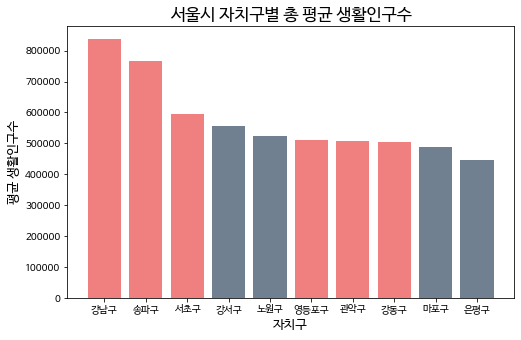

In [44]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(pop_mean_top5['시군구명'], pop_mean_top5['총생활인구수'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("서울시 자치구별 총 평균 생활인구수",fontsize = 17)
plt.xlabel('자치구',fontsize = 13)
plt.ylabel('평균 생활인구수',fontsize = 13)
plt.show()

In [45]:
pop_mean = pop_mean.sort_values(by='PM10', ascending = False).reset_index()
pop_mean_pm10 = pop_mean.head(10)

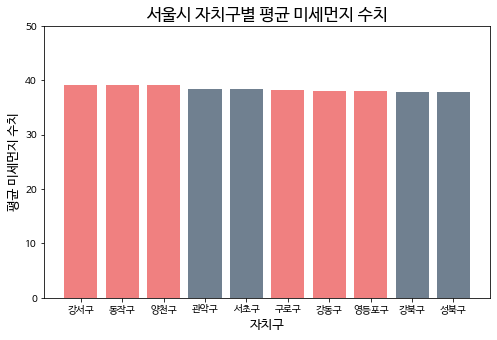

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.1
plt.bar(pop_mean_pm10['시군구명'], pop_mean_pm10['PM10'], color = ['lightcoral','lightcoral','lightcoral','slategrey','slategrey'])
plt.title("서울시 자치구별 평균 미세먼지 수치",fontsize = 17)
plt.xlabel('자치구',fontsize = 13)
plt.ylabel('평균 미세먼지 수치',fontsize = 13)
plt.ylim(0,50)
plt.show()

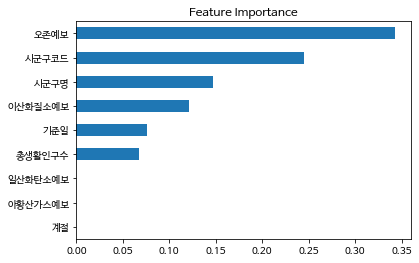

In [48]:
importances = pd.Series(model.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

In [49]:
# PDP

import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = '미세먼지예보'

isolated = pdp_isolate(
    model=model,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

ValueError: ignored